In [1]:
#load data into Pandas
import pandas as pd
df = pd.read_csv("./data/iris.csv")

## 데이터 플롯과 탐구: Seaborn
### pairplot을 통해 pairwise realtionship 시각화

In [2]:
#sanity check with Pandas 데이터점검
print("shape of data in (rows,columns) is " + str(df.shape))
print(df.head())
df.describe().transpose()

shape of data in (rows,columns) is (150, 5)
   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


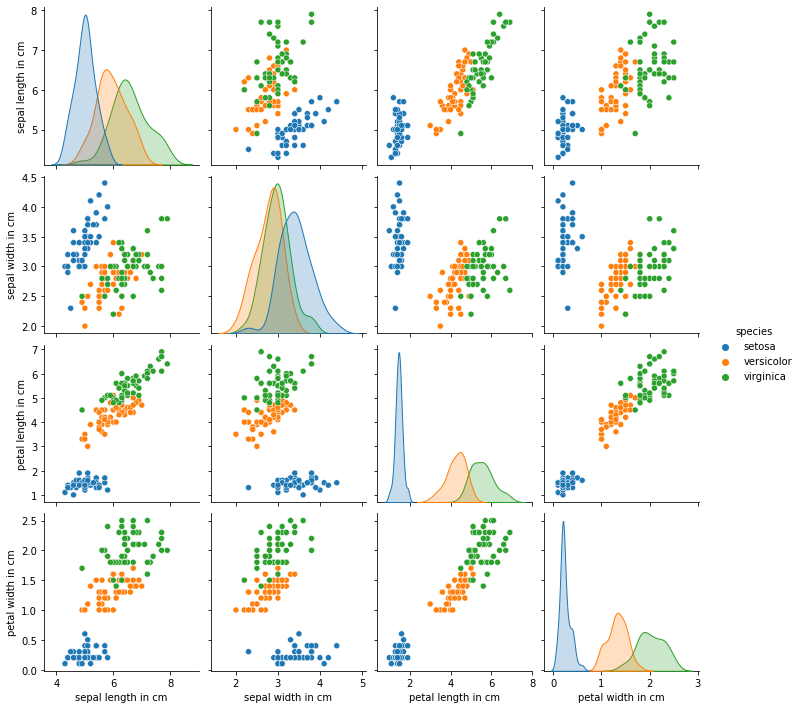

In [3]:
#explore with Seaborn pairplot 
#matplotlib 기반의 파이썬 데이터 시각화 라이브러리

import seaborn as sns
sns.pairplot(df,hue='species')

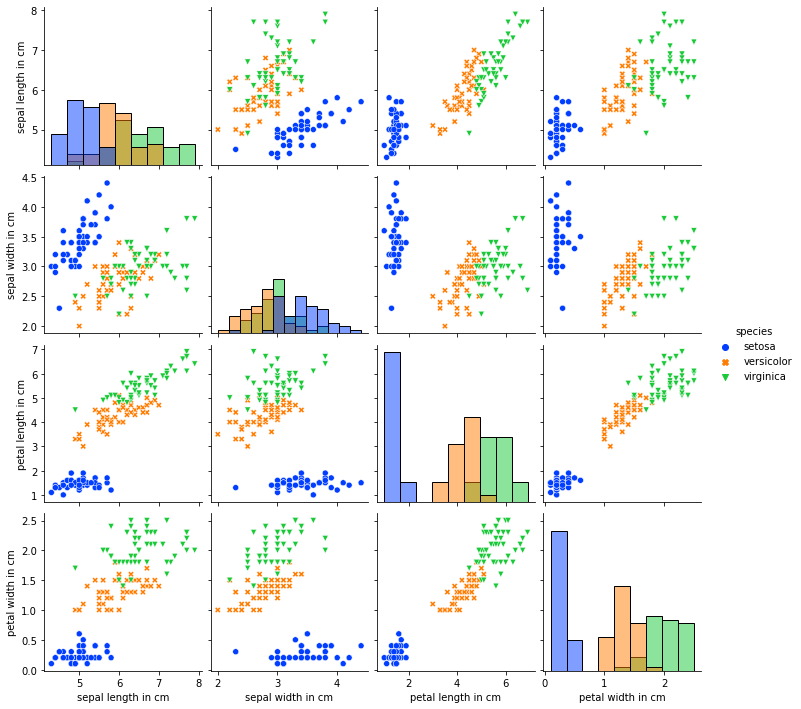

In [15]:
#add histograms to diagonals of Seaborn pairplot

# 페어플롯의 대각선 상에 히스토그램 더하기
# diag_kind 통해 다이어그램을 지정하고, 대각선 상에 히스토그램을 그린다.


sns.pairplot(df,hue='species',diag_kind='hist',palette='bright',markers=["o","X","v"])

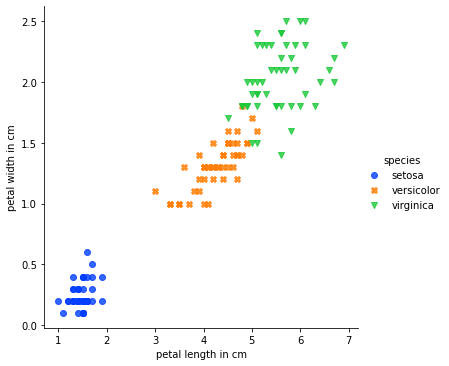

In [24]:
#plot bivariate scatter with Seaborn
sns.lmplot(x='petal length in cm', y='petal width in cm',hue='species',data=df, fit_reg=False, palette='bright',markers=['o','X','v'])

<AxesSubplot:xlabel='species', ylabel='petal length in cm'>

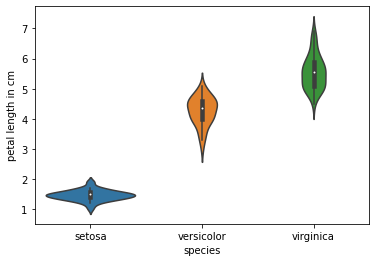

In [25]:
#Violin Plot for 단일특징 벡터
#확률 밀도를 보여주는 단일 변량 분포

sns.violinplot(x='species',y='petal length in cm',data=df)

## scikit-learn을 활용한 PCA와 LDA
### 주요소 분석을 통해 iris 데이터를 두 개의 차원을 갖도록 변환

In [26]:
# reduce dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm',
                               'sepal width in cm',
                               'petal length in cm',
                               'petal width in cm']])

In [28]:
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1','pca2'])
print(df_pca.head())

       pca1      pca2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925


       pca1      pca2 species
0 -2.684207  0.326607  setosa
1 -2.715391 -0.169557  setosa
2 -2.889820 -0.137346  setosa
3 -2.746437 -0.311124  setosa
4 -2.728593  0.333925  setosa


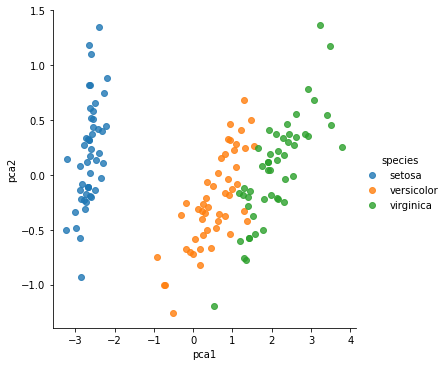

In [29]:
df_pca = pd.concat([df_pca, df[['species']]],axis=1) # concat()을 이용하여 원래 데이터프레임에서 레이블 데이터를 절단하여 열로 연결한다.
print(df_pca.head())
sns.lmplot(x="pca1",y="pca2",hue='species',data=df_pca,fit_reg=False)

## scikit-learn 을 활용한 PCA와 LDA
### 선형 판별 분석을 통해 레이블이 있는 차원 감소

<bound method NDFrame.head of          lda1      lda2    species
0   -8.084953  0.328454     setosa
1   -7.147163 -0.755473     setosa
2   -7.511378 -0.238078     setosa
3   -6.837676 -0.642885     setosa
4   -8.157814  0.540639     setosa
..        ...       ...        ...
145  5.674013  1.661346  virginica
146  5.197129 -0.365506  virginica
147  4.981712  0.812973  virginica
148  5.901486  2.320751  virginica
149  4.684009  0.325081  virginica

[150 rows x 3 columns]>


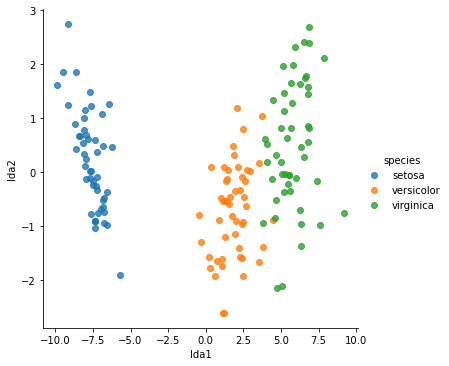

In [30]:
# reduce dimensions with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

#format dataframe
out_lda = lda.fit_transform(X=df.iloc[:,:4], y=df['species'])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1','lda2'])
df_lda = pd.concat([df_lda,df[['species']]],axis=1)

#sanity check
print(df_lda.head)

#plot
sns.lmplot(x="lda1",y="lda2",hue='species',data= df_lda, fit_reg = False)

## PCA 와 LDA 결과 비교 - 바이올린 플롯

Text(0.5, 1.0, 'Violin plot: Feature = PCA_1')

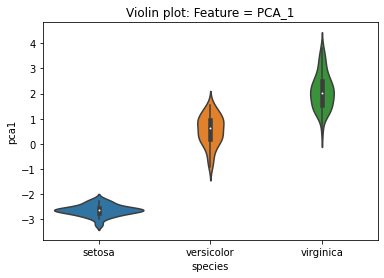

In [32]:
sns.violinplot(x='species',y='pca1', data=df_pca).set_title("Violin plot: Feature = PCA_1")

Text(0.5, 1.0, 'Violin plot: Feature = LDA_1')

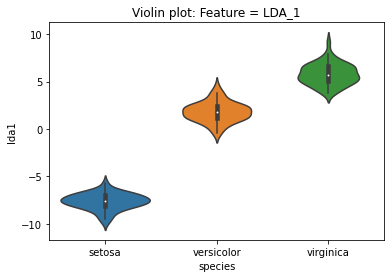

In [34]:
sns.violinplot(x='species',y='lda1', data=df_lda).set_title("Violin plot: Feature = LDA_1")

## K-means Clustering & Silhouette score

In [37]:
#cluster With k-means and check silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#initialize k-means algo object
kmns = KMeans(n_clusters =3, random_state = 42)

#fit algo to pca and find silhouette score
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

#fit algo to lda and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " %silhouette)

PCA silhouette score = 0.5975649100584399
LDA silhouette score = 0.656399 


## 의사 결정, 예측

In [38]:
# 훈련/ 테스트 데이터 분리
# Split into train/validation/test set

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_lda, test_size = 0.3 , random_state = 42)

#Sanity check
print('train set shape = ' + str(df_train.shape))
print('train set shape = ' + str(df_test.shape))
print(df_train.head())

train set shape = (105, 3)
train set shape = (45, 3)
         lda1      lda2     species
81   0.598443 -1.923348  versicolor
133  3.809721 -0.934519   virginica
137  4.993563  0.184883   virginica
75   1.439522 -0.123147  versicolor
109  6.872871  2.694581   virginica


In [41]:
# 예측 모델 수립 : SVM
# F1 점수를 사용하여 테스트 데이터 점수화 : f1_score()

# classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score

clf = SVC(kernel ='rbf', C=0.8, gamma=10)
clf.fit(df_train[['lda1','lda2']],df_train['species'])

#predict on test set
y_pred = clf.predict(df_test[['lda1','lda2']])
f1= f1_score(df_test['species'],y_pred, average = 'weighted')

#check prediction score
print("f1 score for SVM classifier = %2f" %f1)

f1 score for SVM classifier = 0.788061


In [45]:
# C 값 1로 조정

clf = SVC(kernel ='rbf', C=1, gamma=10)
clf.fit(df_train[['lda1','lda2']],df_train['species'])

#predict on test set
y_pred = clf.predict(df_test[['lda1','lda2']])
f1= f1_score(df_test['species'],y_pred, average = 'weighted')

#check prediction score
print("f1 score for SVM classifier = %2f" %f1)

f1 score for SVM classifier = 0.851366


In [46]:
# 매개변수 자동화 : 그리드 검색(grid search)
# 튜닝이 필요 없는 알고리즘 : 랜덤 포레스트

#classify with RF
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =2, random_state=42)
clf.fit(df_train[['lda1','lda2']], df_train['species'])
y_pred = clf.predict(df_test[['lda1','lda2']])
f1 = f1_score(df_test['species'], y_pred, average = 'weighted')

#check prediction score
print ("f1 score for RF classifier =%2f " %f1)

f1 score for RF classifier =0.955291 
